In [ ]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified
!pip install louvain
!pip install scvelo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 91.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
#Import core single cell datasets

import scanpy as sc
import anndata as ad
import numpy as np

In [ ]:
!mkdir -p GSM5115832

In [ ]:
!mkdir -p GSM5115832
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5115nnn/GSM5115832/suppl/GSM5115832%5FE11%5F5%5FmAGM%5FFL%5Fbarcodes.tsv.gz -O /content/GSM5115832/barcodes.tsv.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5115nnn/GSM5115832/suppl/GSM5115832%5FE11%5F5%5FmAGM%5FFL%5Ffeatures.tsv.gz -O /content/GSM5115832/features.tsv.gz
!wget https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5115nnn/GSM5115832/suppl/GSM5115832%5FE11%5F5%5FmAGM%5FFL%5Fmatrix.mtx.gz -O /content/GSM5115832/matrix.mtx.gz


--2026-01-01 14:31:09--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5115nnn/GSM5115832/suppl/GSM5115832%5FE11%5F5%5FmAGM%5FFL%5Fbarcodes.tsv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61513 (60K) [application/x-gzip]
Saving to: ‘/content/GSM5115832/barcodes.tsv.gz’

/content/GSM5115832 100%[===================>]  60.07K  --.-KB/s    in 0.03s   

2026-01-01 14:31:09 (2.03 MB/s) - ‘/content/GSM5115832/barcodes.tsv.gz’ saved [61513/61513]

--2026-01-01 14:31:09--  https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5115nnn/GSM5115832/suppl/GSM5115832%5FE11%5F5%5FmAGM%5FFL%5Ffeatures.tsv.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.11, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP

In [ ]:
e_data = sc.read_10x_mtx('/content/GSM5115832')
e_data

AnnData object with n_obs × n_vars = 12289 × 31053
    var: 'gene_ids', 'feature_types'

In [ ]:
e_data.obs.head()

""
AAACCCACACAAAGCG-1
AAACCCACACGCACCA-1
AAACCCAGTAAGGAGA-1
AAACCCAGTGCCCGTA-1
AAACCCAGTGGTACAG-1


In [ ]:
e_data.var.head()

,gene_ids,feature_types
Xkr4,ENSMUSG00000051951,Gene Expression
Gm1992,ENSMUSG00000089699,Gene Expression
Gm37381,ENSMUSG00000102343,Gene Expression
Rp1,ENSMUSG00000025900,Gene Expression
Sox17,ENSMUSG00000025902,Gene Expression


In [ ]:
e_data.var_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

In [ ]:
e_data.var['MT'] = e_data.var_names.str.startswith('MT-')

In [ ]:
mt_genes = e_data.var[e_data.var['MT']]
mt_genes.head()

,gene_ids,feature_types,MT


In [ ]:
sc.pp.calculate_qc_metrics(e_data, qc_vars=['MT'], inplace=True, log1p= True)

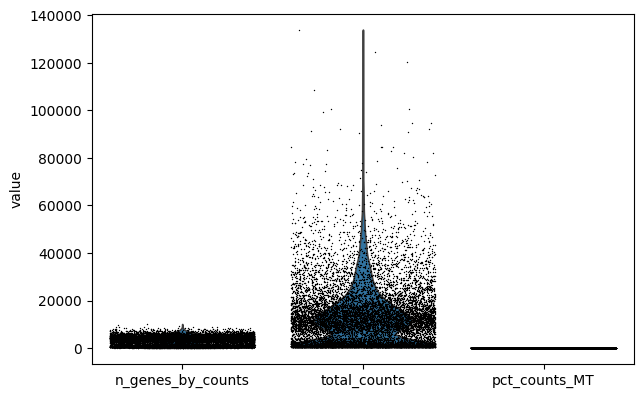

In [ ]:
sc.pl.violin(e_data, ['n_genes_by_counts', 'total_counts', 'pct_counts_MT'], jitter=0.4, multi_panel= False)

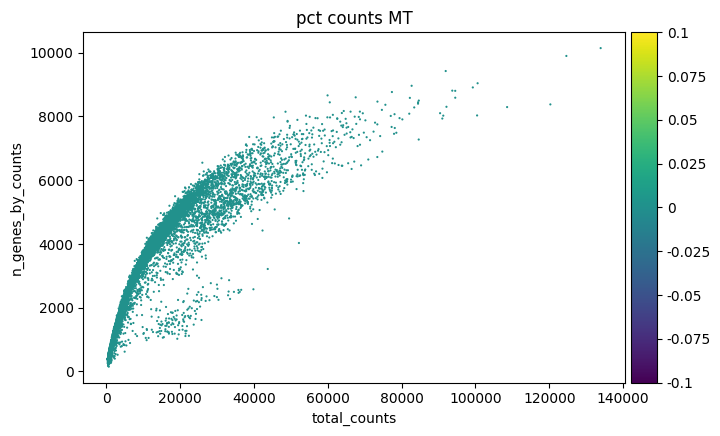

In [ ]:
sc.pl.scatter(e_data, x='total_counts', y= 'n_genes_by_counts', color='pct_counts_MT')

In [ ]:
e_data.var['HB'] = e_data.var_names.str.startswith("HB")
H_genes = e_data.var[e_data.var['HB']]
H_genes

,gene_ids,feature_types,MT,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,HB


In [ ]:
e_data.layers['counts'] = e_data.X.copy()

normalisation


In [ ]:
sc.pp.normalize_total(e_data, target_sum= 1e4)

In [ ]:
sc.pp.log1p(e_data)

In [ ]:
sc.pp.highly_variable_genes(e_data, n_top_genes=2500)

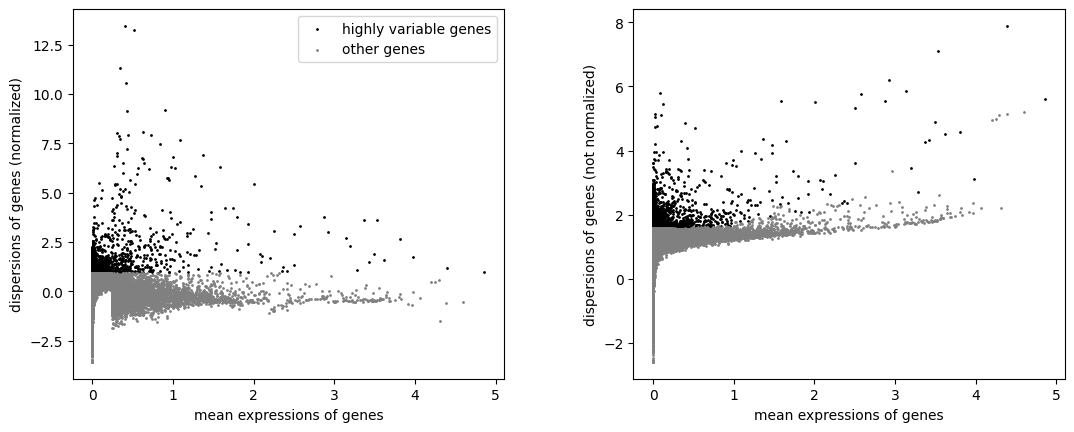

In [ ]:
sc.pl.highly_variable_genes(e_data)

In [ ]:
sc.tl.pca(e_data, n_comps= 100)

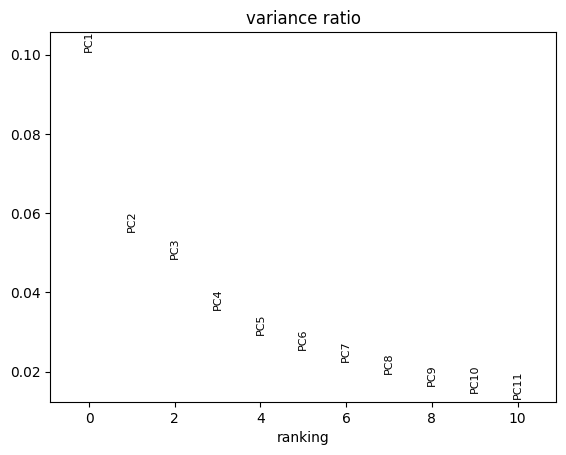

In [ ]:
sc.pl.pca_variance_ratio(e_data, n_pcs=10)

In [ ]:
sc.pp.neighbors(e_data)

In [ ]:
sc.tl.umap(e_data, min_dist=0.5)

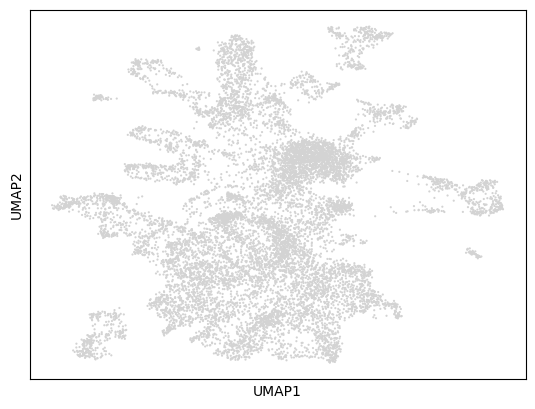

In [ ]:
sc.pl.umap(e_data)

In [ ]:
sc.tl.leiden(e_data, resolution=0.1)

/tmp/ipython-input-3380442944.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(e_data, resolution=0.1)


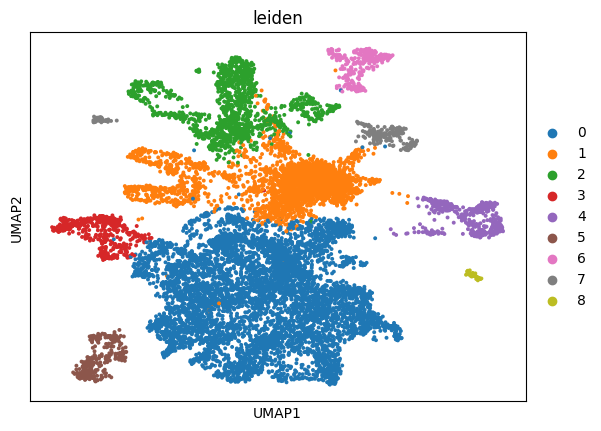

In [ ]:
sc.pl.umap(e_data, color='leiden', size= 32)

In [ ]:
sc.tl.leiden(e_data, resolution=0.15)

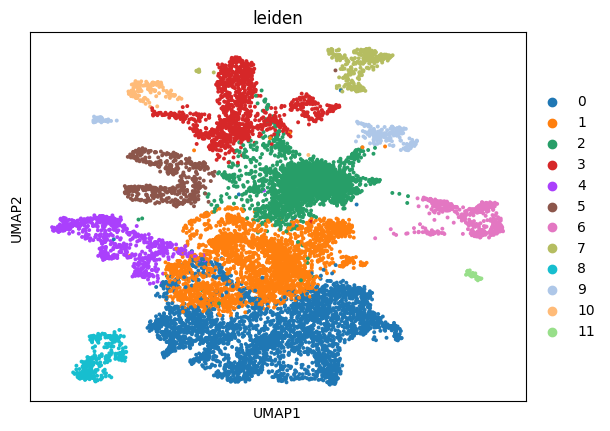

In [ ]:
sc.pl.umap(e_data, color='leiden', size= 32)

In [ ]:
sc.tl.leiden(e_data, resolution=0.2)

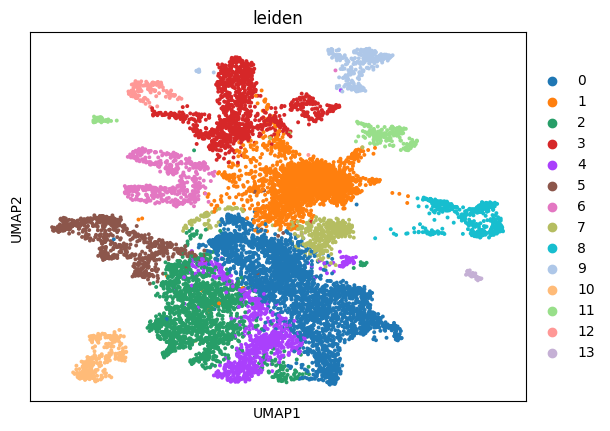

In [ ]:
sc.pl.umap(e_data, color='leiden', size= 32)

In [ ]:
import decoupler as dc

In [ ]:
markers = dc.op.resource(name = "PanglaoDB", organism= "mouse")
markers = markers[markers["mouse"]]
markers = markers[~markers.duplicated(subset=["cell_type", "genesymbol"])]
markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]
markers.head()

,source,target
0,Hepatocytes,A1cf
1,Bergmann glia,A2m
2,Bergmann glia,Mug2
3,Bergmann glia,Mug1
4,Mast cells,A4galt


In [ ]:
dc.mt.ulm(data=e_data, net=markers,tmin = 3)

In [ ]:
score = dc.pp.get_obsm(e_data, key="score_ulm")

In [ ]:
e_data.obsm["score_ulm"].head(1)


,Acinar cells,Adipocyte progenitor cells,Adipocytes,Adrenergic neurons,Airway epithelial cells,Airway goblet cells,Airway smooth muscle cells,Alpha cells,Alveolar macrophages,Anterior pituitary gland cells,...,Thymocytes,Transient cells,Trichocytes,Trigeminal neurons,Trophoblast cells,Trophoblast progenitor cells,Tuft cells,Undefined placental cells,Urothelial cells,Vascular smooth muscle cells
AAACCCACACAAAGCG-1,-0.749787,-0.551047,-0.618078,4.794991,-0.246348,-0.590971,-0.246348,-0.836186,-0.640358,-0.652123,...,-0.537082,0.925547,-0.275432,-0.827028,-0.616157,-0.213339,0.528896,-0.426763,-0.444199,-0.301727


In [ ]:
#rank genes
gene_rank = dc.tl.rankby_group(score, groupby="leiden", reference="rest", method="t-test_overestim_var")
gene_rank = gene_rank[gene_rank["stat"] > 0]
gene_rank.head(5)

,group,reference,name,stat,meanchange,pval,padj
0,7,rest,T helper cells,23.580175,0.953324,9.746054e-97,1.695813e-94
1,7,rest,Intercalated cells,22.674029,0.756884,4.282429e-91,3.725714e-89
2,7,rest,Follicular cells,22.584567,0.566373,9.718902e-91,5.636963e-89
3,7,rest,Langerhans cells,21.833581,0.652837,9.593342e-86,4.173104e-84
4,7,rest,Interneurons,20.949947,1.354302,4.709844e-80,1.639026e-78


In [ ]:
top_cell_type_per_group = gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))
display(top_cell_type_per_group.to_dict())



/tmp/ipython-input-559594618.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_cell_type_per_group = gene_rank.groupby('group')['name'].apply(lambda x: x.head(1))


{('0', 696): 'Fibroblasts',
 ('1', 174): 'T cells naive',
 ('10', 2262): 'Anterior pituitary gland cells',
 ('11', 1566): 'Endothelial cells',
 ('12', 2088): 'Dendritic cells',
 ('13', 1914): 'Pluripotent stem cells',
 ('2', 348): 'Gamma delta T cells',
 ('3', 1044): 'Erythroblasts',
 ('4', 870): 'Tanycytes',
 ('5', 1740): 'Sertoli cells',
 ('6', 523): 'Glomus cells',
 ('7', 0): 'T helper cells',
 ('8', 1392): 'Hepatoblasts',
 ('9', 1218): 'Erythroid-like and erythroid precursor cells'}

In [ ]:
dict_ann = gene_rank[gene_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()
dict_ann

/tmp/ipython-input-1038586691.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dict_ann = gene_rank[gene_rank["stat"] > 0].groupby("group").head(1).set_index("group")["name"].to_dict()


{'7': 'T helper cells',
 '1': 'T cells naive',
 '2': 'Gamma delta T cells',
 '6': 'Glomus cells',
 '0': 'Fibroblasts',
 '4': 'Tanycytes',
 '3': 'Erythroblasts',
 '9': 'Erythroid-like and erythroid precursor cells',
 '8': 'Hepatoblasts',
 '11': 'Endothelial cells',
 '5': 'Sertoli cells',
 '13': 'Pluripotent stem cells',
 '12': 'Dendritic cells',
 '10': 'Anterior pituitary gland cells'}

In [ ]:
e_data.obs["leiden"] = e_data.obs["leiden"].cat.rename_categories(dict_ann)


In [ ]:
e_data.obs["leiden"].cat.categories

Index(['Fibroblasts', 'T cells naive', 'Gamma delta T cells', 'Erythroblasts',
       'Tanycytes', 'Sertoli cells', 'Glomus cells', 'T helper cells',
       'Hepatoblasts', 'Erythroid-like and erythroid precursor cells',
       'Anterior pituitary gland cells', 'Endothelial cells',
       'Dendritic cells', 'Pluripotent stem cells'],
      dtype='object')

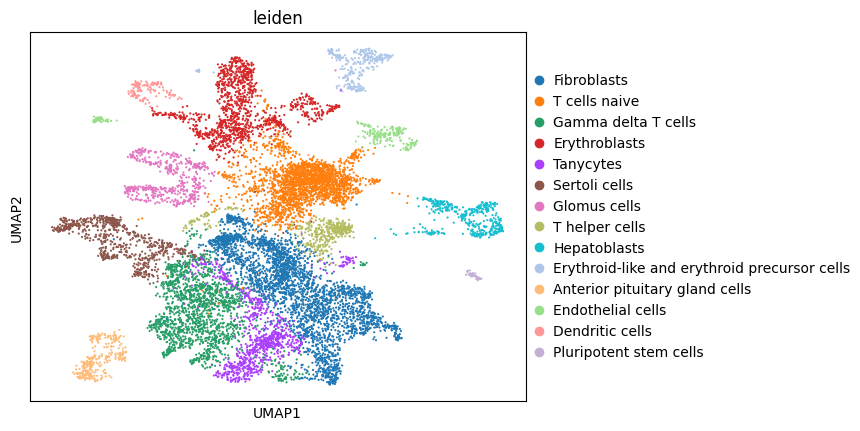

In [ ]:
sc.pl.umap(
    adata=e_data,
    color=["leiden"],
    ncols=1,
)


trajectory analysis

In [ ]:
sc.tl.draw_graph(e_data)

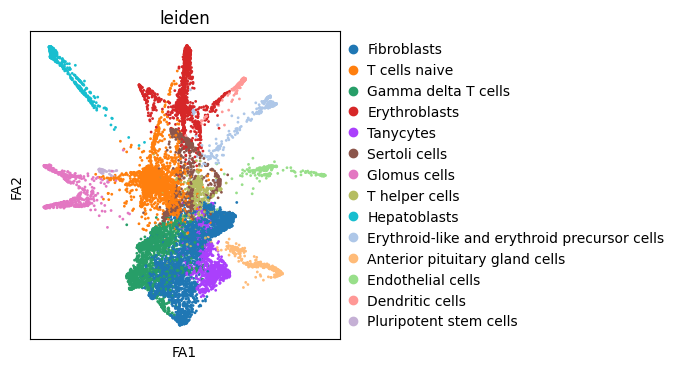

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4,4)
sc.pl.draw_graph(e_data, color='leiden', size = 16)

In [ ]:
sc.tl.paga(e_data, groups = "leiden")

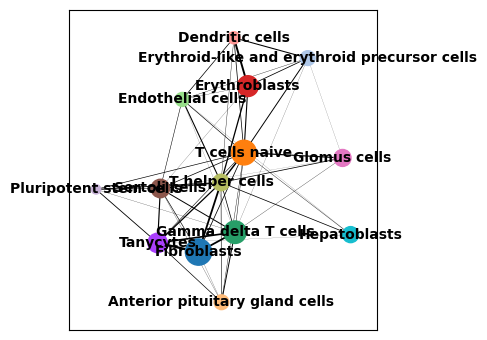

In [ ]:
sc.pl.paga(e_data, color = "leiden")

In [ ]:
sc.tl.draw_graph(e_data, init_pos='paga')

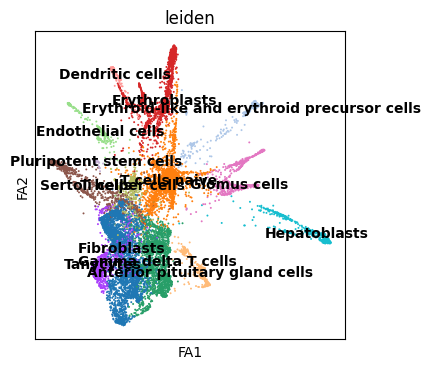

In [ ]:
sc.pl.draw_graph(e_data, color = "leiden", legend_loc = "on data",size= 8)

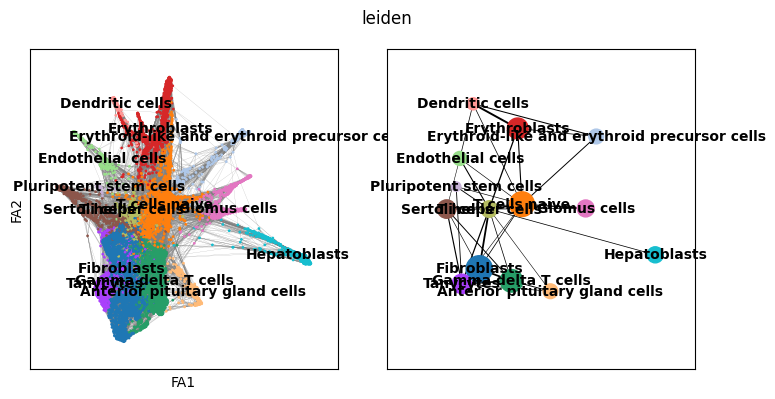

[<Axes: xlabel='FA1', ylabel='FA2'>, <Axes: >]

In [ ]:
sc.pl.paga_compare(e_data, frameon= True, threshold= 0.05, edges = True, size = 16)

In [ ]:
e_data.uns['iroot'] = np.flatnonzero(e_data.obs['leiden']  == 'Pluripotent stem cells')[0]
sc.tl.dpt(e_data)

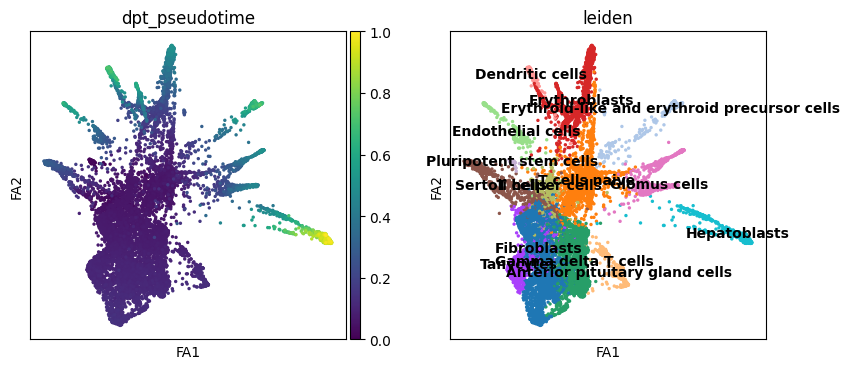

In [ ]:

sc.pl.draw_graph(e_data, color=['dpt_pseudotime', 'leiden'], legend_loc='on data', size = 24)